# Projeto II - Processamento Digital de Sinais
<br> Alunos:
<br> Diego Hamilton
<br> Pedro Peixoto

## Introdução

<br> A filtragem de sinais pode ser tratada, para alguns, como a lente de contato que permite disfrutar de maravilhas da vida sem lidar com as confusões geradas pelo ruído. O processamento digital de sinais é a razão pela qual dados podem ser transmitidos pelo ar de forma confiável, ou medições em um sistema podem ser aferidas com um satisfatório grau de confiança. É dado esse papel fundamental dos filtros digitais que se faz essencial estudar as técnicas de projetos de filtros digitais, tema deste projeto.

***
## Parte 1

### 1.1) Use o comando MATLAB butter para projetar um filtro passa-baixas IIR de sexta ordem, com frequência de corte de 0,5 Hz; considere que a frequência de amostragem é de 4 Hz. Esboce a magnitude e a fase da resposta em frequência (RF) do filtro. Esboce também o diagrama de polos e zeros (DPZ) e a parte significativa da resposta ao impulso do filtro. Comente sobre a relação entre esses gráficos. É possível obter quaisquer dois deles a partir do terceiro?


In [1]:
pkg load signal
pkg load control

In [2]:
f = 0.5;
fs = 4;
wc = f/fs;    % frequencia normalizada

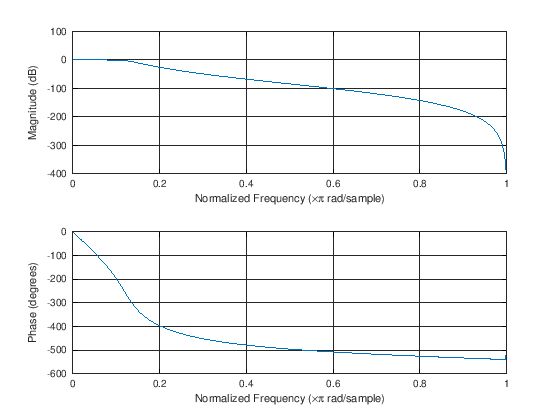

In [3]:
[b,a] = butter(6, wc, ftype = 'low');
freqz(b,a)

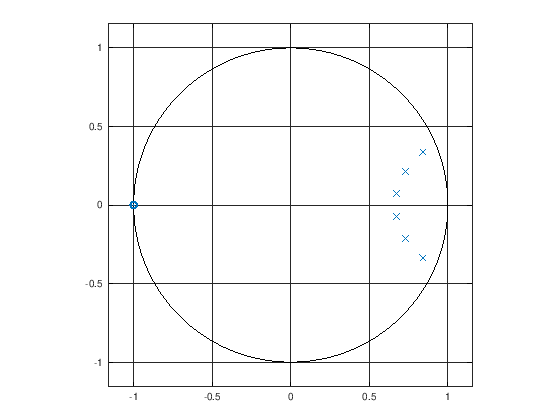

In [4]:
zplane(b,a)

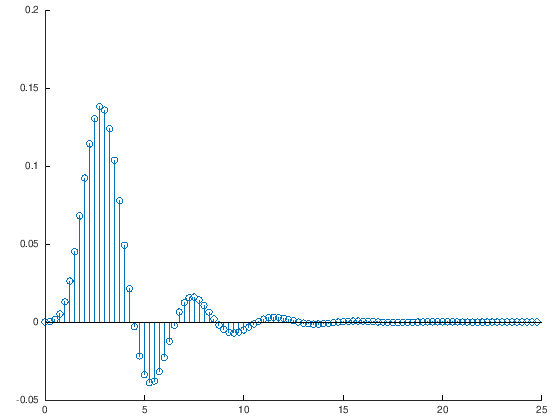

In [5]:
[h,t] = impz(b, a, 100, fs);
stem(t, h)

<br> Os gráficos se relacionam pela dependência entre a posição dos polos e zeros e a resposta em frequência do filtro. Como visto ao longo do curso, a magnitude da resposta em frequência é dependente dos vetores polo e dos vetores zero. A fase pode ser obtida a partir da função $H(e^{(j\omega)})$, separando-a em parte real e imaginária, e fazendo que $\angle H(e^{(j\omega)}) = atan\frac{Im(H(e^{(j\omega)}))}{Re(H(e^{(j\omega)}))}$ 
<br> É possível obter os dois primeiros através do terceiro, pois é conhecia a relação da transformada:
$H(z) = \sum_{n = - \infty}^{\infty} h[n]z^{-n}$
<br> Assim, utilizando a parte significativa (dentro de um limite estabelecido) da resposta ao impulso $h[n]$ é possível obter a função $H(z)$ e assim os demais gráficos. 

### 1.2) Na transformação bilinear (TBL), considerando pelo menos três valores de T, esboce em uma mesma figura a relação entre a frequência digital $\omega$ e a frequência analógica $\Omega$. Se a frequência de corte do filtro analógico protótipo é $\Omega_C = 2 rad/s$, como a frequência de corte $\omega_C$ varia em função de T?
### Esboce essa função ($\omega_C = f(T)$).


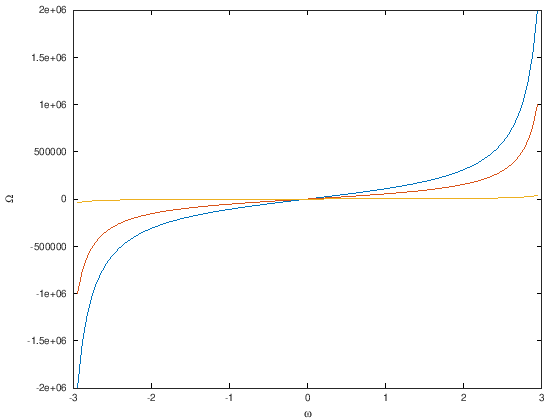

In [6]:
T1 = 1e-5;
T2 = 2e-5;
T3 = 5e-4;

function omega = tbl(w, ts)
    omega = (2/ts)*tan(w/2);
endfunction

w = linspace(-pi+2e-1, pi-2e-1, 100);    % nao contempla o intervalo por completo para enquadrar melhor o plot (nos valores de pi e -pi, omega tende a infinito)
plot(w, tbl(w, T1), w, tbl(w, T2), w, tbl(w, T3))
xlabel('\omega')
ylabel('\Omega')

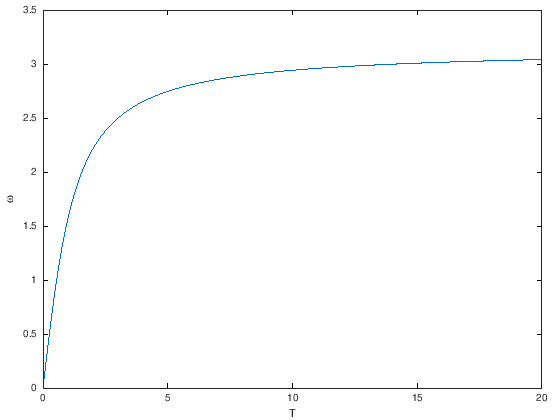

In [7]:
function w = tblinv(omega, ts)
    w = 2*atan((omega*ts)/2);
endfunction

T = linspace(1/100, 20, 1000);
plot(T, tblinv(2, T))
xlabel('T')
ylabel('\omega')

A partir do gráfico acima podemos ver que a frequência $\omega_C$ varia de forma aproximadamente linear quando o período de amostragem T é menor que 1s, e tende a $\pi$ quando T tende a $\infty$

### 1.3) Use a TBL para projetar um filtro digital de Butterworth passa-baixas de ordem 4 e frequência de corte 8 kHz. Considere uma frequência de amostragem de 40 kHz.
#### i) Qual a frequência de corte do filtro protótipo?

In [8]:
fc = 8000;
fs = 40000;
wc = 2*pi*fc/fs;
omegac = tbl(wc, 1/fs);  % pre warp
% omegac = 2*fs*tan(wc/2);
new_fc = omegac/(2*pi)
% new_wc = new_fc/fs;
[b, a] = butter(4, omegac, 's');

new_fc =  9250.6


A frequência de corte a ser utilizada no projeto do filtro analógico é de 9250,6Hz para obter uma frequência de corte de 8kHz no filtro digital após a aplicação da Transformação Bilinear.

#### ii) Encontre H(S) e esboce seu DPZ.


Transfer function 'H' from input 'u1' to output ...

                                1.141e+19                          
 y1:  -------------------------------------------------------------
      s^4 + 1.519e+05 s^3 + 1.153e+10 s^2 + 5.131e+14 s + 1.141e+19

Continuous-time model.


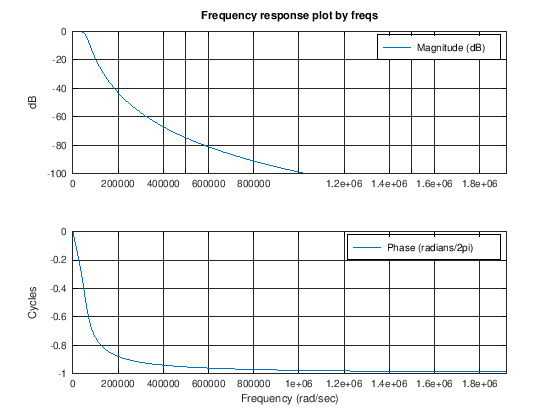

In [9]:
w = logspace(-2*pi, 2*pi, 1000);
H = tf(b,a)                  % transforma constante dos polinômios na notação da função transf.
freqs(b, a, w);              % calcula e plota resposta em frequência do filtro

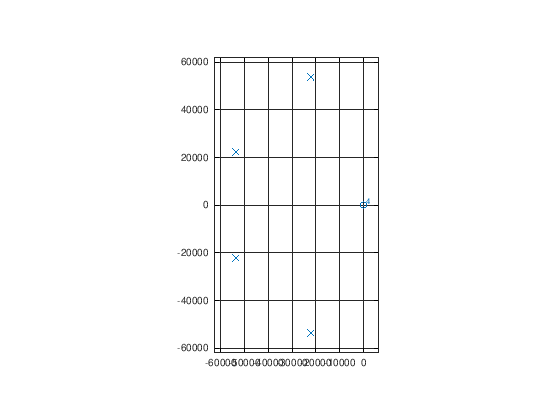

In [10]:
zplane(b, a);

#### iii) Encontre H(Z). Esboce a resposta em frequência, a resposta ao impulso e o DPZ de H(Z)


Transfer function 'ans' from input 'u1' to output ...

      0.04658 s^4 + 0.1863 s^3 + 0.2795 s^2 + 0.1863 s + 0.04658
 y1:  ----------------------------------------------------------
           s^4 - 0.7821 s^3 + 0.68 s^2 - 0.1827 s + 0.03012     

Continuous-time model.


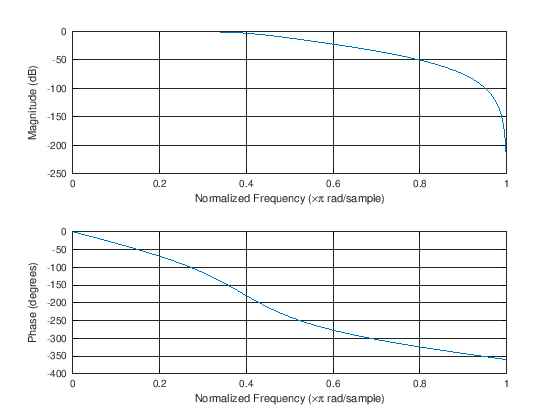

In [11]:
[bd, ad] = bilinear(b, a, 1/fs);
% [bd, ad] = zp2tf(z, p, k);
tf(bd, ad)
freqz(bd, ad);

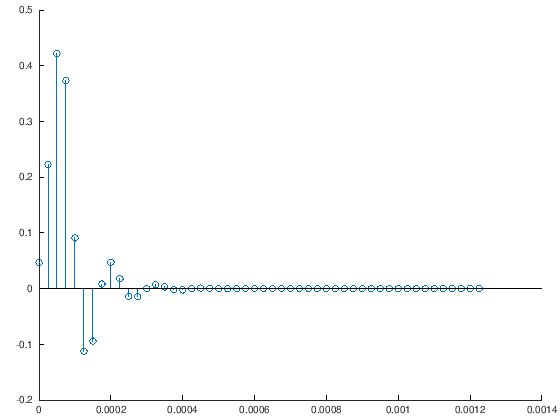

In [12]:
[h,t] = impz(bd, ad, 50, fs);
stem(t, h)

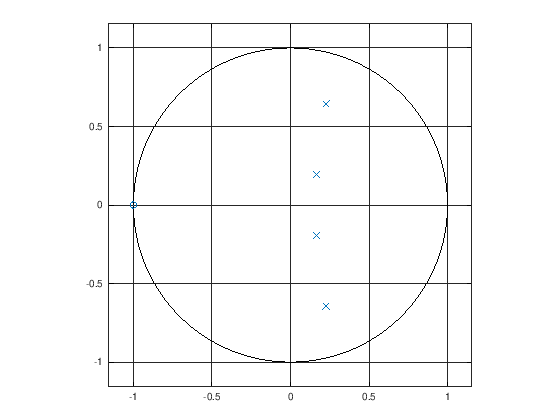

In [13]:
zplane(bd, ad)

Como esperado, a transformação bilinear levou os polos e zeros do semi plano esquerdo em polos e zeros no círculo unitário do plano Z.

***
## Parte 2
### 2.1)  Projete um filtro FIR FLG passa-altas h[n] de comprimento 22 com $\omega_s = 0.2\pi$ e $\omega_p = 0.4\pi$ usando as janelas: i) Retangular; ii) Hamming. Em cada caso apresente os valores de h[n], esboce a resposta ao impulso, a resposta em amplitude e o DPZ. Compare as características das respostas em amplitude dos dois filtros. Use programas/aplicativos prontos apenas para fazer os esboços pedidos. Qual desses filtros é o mais seletivo?


Consideramos a frequência de corte $\omega_c$ como a média das frequências $\omega_s$ e $\omega_p$, assim $\omega_c = 0.4\pi$. Assim o filtro passa alta pode ser projetado a partir do filtro passa baixa: $h_{pb}[n] = \frac{sin(\omega_cn)}{\pi n}$, tal que $h_{pa} = \delta[n] - h_{pb}[n] = \delta[n] - \frac{sin(0.4\pi n)}{\pi n}$

<br> Como um filtro passa-alta não pode possuir M ímpar (acarreta em zero em $\pi$), escolhemos $M = 22$ e o comprimento $L = 23$

In [29]:
M = 22;
ret_w = ones(M+1, 1);

impulse = zeros(M+1,1);
impulse(1) = 1;

ham_w = hamming(M);

### 2.2) Projete um filtro passa-faixa de comprimento 31 por meio da janela de Kaiser, com $\beta = 4$ e 9 (são dois filtros). Considere as bandas 0 ≤ ω ≤ 0,08π (banda de rejeição inferior), $0,1\pi \leq \omega \leq 0,3\pi$ (banda de passagem) e $0,4\pi ≤ \omega ≤ \pi$ (banda de rejeição superior). Esboce a resposta ao impulso, a resposta em amplitude e o DPZ dos dois filtros. Compare as respostas em amplitude com a resposta ideal, esboçando-as no mesmo gráfico. Qual o melhor filtro? Como o compromisso seletividade x overshoot varia com $\beta$?

In [23]:
% [bh, ah] = butter(M/2, wc1/(2*pi), ftype = 'high');
% [bl, al] = butter(M/2, wc2/(2*pi), ftype = 'low');
% [hh, th] = impz(bh, ah, 100);
% [hl, tl]= impz(bl, al, 100);
% zplane(z,p);

w_b4 = kaiser(M+1, 4);
w_b9 = kaiser(M+1, 9);

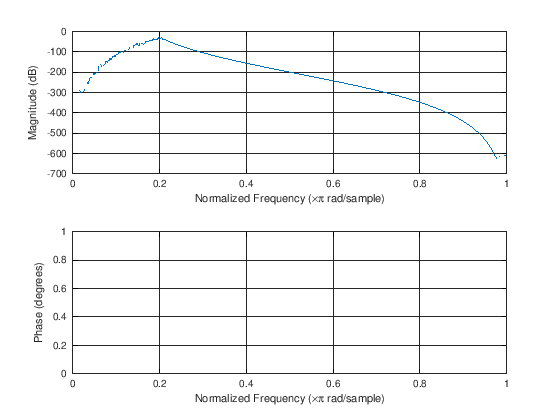

In [24]:
M = 30;
wc1 = (0.08*pi+0.1*pi)/2;    % wc1 = 0.09*pi
wc2 = (0.3*pi+0.4*pi)/2;     % wc2 = 0.35*pi
[b, a] = butter(M/2, [wc1/(2*pi) wc2/(2*pi)], ftype = 'bandpass');

freqz(b,a);

h_b4 =

   6.8064e-13
   2.7064e-11
   4.7763e-10
   5.1738e-09
   3.9428e-08
   2.2794e-07
   1.0484e-06
   3.9617e-06
   1.2583e-05
   3.4132e-05
   7.9891e-05
   1.6218e-04
   2.8511e-04
   4.2873e-04
   5.3217e-04
   5.3627e-04
   5.3217e-04
   4.2873e-04
   2.8511e-04
   1.6218e-04
   7.9891e-05
   3.4132e-05
   1.2583e-05
   3.9617e-06
   1.0484e-06
   2.2794e-07
   3.9428e-08
   5.1738e-09
   4.7763e-10
   2.7064e-11
   6.8064e-13



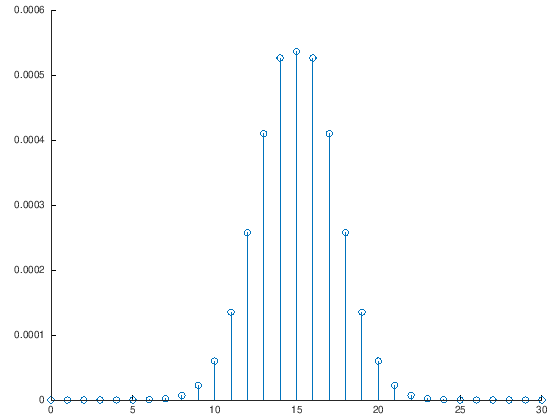

In [25]:
[h, t] = impz(b, a, 31);
hx = h(1:M/2, 1);
hy = flipud(hx);
h = [hx; h(M/2); hy];
h_b4 = w_b4 .* h
% stem(t, h_b4)
h_b9 = w_b9 .* h;
stem(t, h_b9);
% stem(t, h)

In [26]:
ztrans(h)

error: 'ztrans' undefined near line 1 column 1
